## First Neurons

In [1]:
import numpy as np
import tensorflow as tf

set random seed for numpy and tensorflow to ensure reproductivity

In [2]:
#np.random.seed(101) #not that useful
tf.set_random_seed(101)

generate some random numbers

In [3]:
np.random.seed(101) #must be in the same cell, otherwise, we won't get the same data sets even though the random see is set at the very beginning
rand_a = np.random.randint(0, 100, (5, 5))
rand_a

array([[95, 11, 81, 70, 63],
       [87, 75,  9, 77, 40],
       [ 4, 63, 40, 60, 92],
       [64,  5, 12, 93, 40],
       [49, 83,  8, 29, 59]])

In [4]:
np.random.seed(101)
rand_b = np.random.randint(0, 100, (5, 1))
rand_b

array([[95],
       [11],
       [81],
       [70],
       [63]])

## Placeholders

In [5]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

## Operations

In [6]:
add_op = tf.add(a, b)
mult_op = tf.multiply(a, b)

## Running sessions to create graphs with feed dictionaries

In [7]:
with tf.Session() as sess:
    add_result = sess.run(add_op, {a: rand_a, b: rand_b})
    print (add_result)
    print ('\n\n')
    multiply_result = sess.run(mult_op, {a: rand_a, b:rand_b})
    print (multiply_result)

[[190. 106. 176. 165. 158.]
 [ 98.  86.  20.  88.  51.]
 [ 85. 144. 121. 141. 173.]
 [134.  75.  82. 163. 110.]
 [112. 146.  71.  92. 122.]]



[[9025. 1045. 7695. 6650. 5985.]
 [ 957.  825.   99.  847.  440.]
 [ 324. 5103. 3240. 4860. 7452.]
 [4480.  350.  840. 6510. 2800.]
 [3087. 5229.  504. 1827. 3717.]]


## Example Neural Network

In [8]:
n_features = 10
n_dense_neurons = 3

In [ ]:
#placeholder for x, where data type is a required argument
x = tf.placeholder(tf.float32, (None, n_features), name='input') #data type, shape, and name

In [ ]:
#variables for w and b
w = tf.Variable(tf.random_normal((n_features, n_dense_neurons))) #shape is required, others are optional
b = tf.Variable(tf.ones((n_dense_neurons)))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
z = tf.add(tf.matmul(x, w), b)

In [ ]:
p_sigmoid = tf.sigmoid(z)
p_tanh = tf.tanh(z)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
np.random.seed(101) #
with tf.Session() as sess:
    sess.run(init)
    output_sigmoid = sess.run(p_sigmoid, {x: np.random.random((2, n_features))})
    output_tanh = sess.run(p_tanh, {x: np.random.random((5, n_features))})
    print (output_sigmoid)
    print ('\n\n')
    print (output_tanh)

[[0.64081025 0.91926014 0.35007894]
 [0.62502205 0.91362137 0.32650024]]



[[ 0.39395294  0.9408955  -0.22806858]
 [-0.88790464  0.9322689  -0.51330787]
 [-0.65267533 -0.04551553 -0.82326365]
 [ 0.22556512  0.95278907  0.6737265 ]
 [-0.48861787  0.92911845 -0.4703243 ]]


## Full Network Example

In [2]:
#make up some data
x_data = np.linspace(0, 10, 20) + np.random.uniform(-1, 1, 20)
x_data

array([ 0.46560591,  0.89928139,  1.20172125,  0.66406981,  1.32251585,
        2.97994368,  2.52535382,  4.28598166,  3.85863072,  4.46700857,
        5.70636053,  5.30929365,  6.48383738,  6.93624234,  7.84712172,
        7.21282038,  8.4370101 ,  8.48786997,  8.76801635, 10.40716997])

In [3]:
y_label = np.linspace(0, 10, 20) + np.random.uniform(-1.5, 1.5, 20)
y_label 

array([-1.01615558, -0.79440785,  1.52781845,  1.28287612,  1.3162044 ,
        2.34585883,  3.23108316,  4.49166694,  5.35350688,  4.32024987,
        4.56902558,  5.63318719,  7.00919797,  7.61797197,  8.04965333,
        6.85755419,  9.23237373,  9.09117371, 10.81313534,  9.73340822])

In [4]:
import matplotlib.pyplot as plt

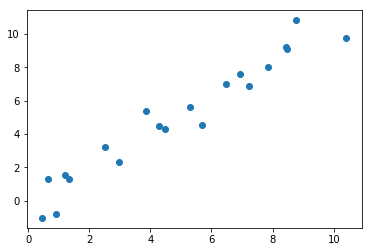

In [6]:
plt.scatter(x_data, y_label)

In [14]:
np.random.seed(3)
rnd = np.random.rand(2)
print (rnd)
m, b = tf.Variable(initial_value=rnd[0]), tf.Variable(initial_value=rnd[1])

[0.5507979  0.70814782]


### Cost Function

In [15]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x+b
    error += (y-y_hat)**2

### Optimizer

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(error)

In [28]:
init = tf.global_variables_initializer()

In [37]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 1000
    for i in range(epochs):
        sess.run(train)
    slop, intercept = sess.run([m, b])

In [38]:
slop, intercept

(1.0404118876825703, 0.024304298835665723)

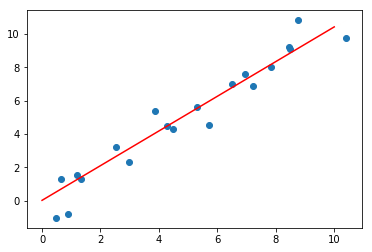

In [39]:
plt.scatter(x_data, y_label)
points = np.linspace(0, 10, 10)
y_pred = slop*points+intercept
plt.plot(points, y_pred, 'r')